In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Flatten
from keras. layers import MaxPooling2D
from keras.layers import Dense
import numpy as np
from keras.layers import Dropout
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.4,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set =train_datagen.flow_from_directory('/content/drive/MyDrive/pneunomia_data/chest_xray/train',target_size = (64, 64),batch_size = 8,class_mode = 'sparse')
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/pneunomia_data/chest_xray/test',target_size = (64, 64),batch_size = 8,class_mode = 'sparse')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [4]:
model_transfer = Sequential()
pre_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(64, 64, 3),
    pooling='avg',  # Change to 'avg'
    classes=1,  # Change to 1 for binary classification
)

for layer in pre_model.layers:
    layer.trainable = False

model_transfer.add(pre_model)
model_transfer.add(Flatten())
model_transfer.add(Dense(units=128, activation='relu'))
model_transfer.add(Dense(units=1, activation='sigmoid'))  # Change to sigmoid for binary classification
model_transfer.summary()


94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 23850113 (90.98 MB)
Trainable params: 262401 (1.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [5]:
model_transfer.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [6]:
history=model_transfer.fit(training_set ,steps_per_epoch=10 ,epochs = 30)

Epoch 1/30
10/10 [==============================] - 166s 18s/step - loss: 0.6197 - accuracy: 0.7750
Epoch 2/30
10/10 [==============================] - 12s 1s/step - loss: 0.6805 - accuracy: 0.6500
Epoch 3/30
10/10 [==============================] - 8s 680ms/step - loss: 0.6310 - accuracy: 0.7000
Epoch 4/30
10/10 [==============================] - 10s 1s/step - loss: 0.6403 - accuracy: 0.7000
Epoch 5/30
10/10 [==============================] - 8s 837ms/step - loss: 0.5062 - accuracy: 0.7750
Epoch 6/30
10/10 [==============================] - 6s 461ms/step - loss: 0.5262 - accuracy: 0.8000
Epoch 7/30
10/10 [==============================] - 10s 981ms/step - loss: 0.5879 - accuracy: 0.7125
Epoch 8/30
10/10 [==============================] - 8s 773ms/step - loss: 0.4929 - accuracy: 0.7750
Epoch 9/30
10/10 [==============================] - 7s 679ms/step - loss: 0.5093 - accuracy: 0.7500
Epoch 10/30
10/10 [==============================] - 12s 1s/step - loss: 0.6317 - accuracy: 0.6375
Epoc

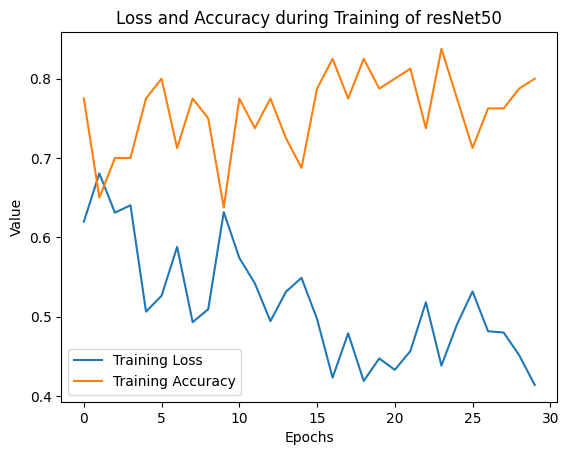

In [7]:
import matplotlib.pyplot as plt

# Get training history
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']



# Plot loss and accuracy on the same graph

plt.plot(train_loss, label='Training Loss')
plt.plot(train_accuracy, label='Training Accuracy')



plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Loss and Accuracy during Training of resNet50')
plt.legend()
plt.show()

In [8]:
# Evaluate the model
test_loss, test_accuracy = model_transfer.evaluate(test_set )
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

78/78 [==============================] - 202s 3s/step - loss: 0.4299 - accuracy: 0.8205
Test Loss: 0.429871529340744
Test Accuracy: 0.8205128312110901


In [9]:
import numpy as np
from keras.preprocessing import image
from keras.models import load_model

# Load and preprocess the test image
test_image = image.load_img('/content/drive/MyDrive/pneunomia_data/chest_xray/test/PNEUMONIA/person103_bacteria_488.jpeg', target_size=(64, 64))
test_image = image.img_to_array(test_image)

# Normalize pixel values to [0, 1]
test_image /= 255.0

# Expand dimensions to match model input shape
test_image = np.expand_dims(test_image, axis=0)

# Make a prediction
classes = model_transfer.predict(test_image, batch_size=10)

# Debugging Information
print("Shape of test_image:", test_image.shape)
print("Raw Predictions:", classes)

# Check the prediction result using a threshold of 0.5
if classes[0] >= 0.5:
    print("Pneumonia")
else:
    print("Normal")


1/1 [==============================] - 1s 1s/step
Shape of test_image: (1, 64, 64, 3)
Raw Predictions: [[0.7834322]]
Pneumonia
